In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 시각화하기

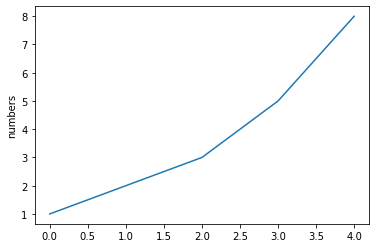

In [2]:
plt.plot([1, 2, 3, 5, 8])
plt.ylabel('numbers')
plt.show()

Text(0.5, 0.98, 'Categorical Plotting')

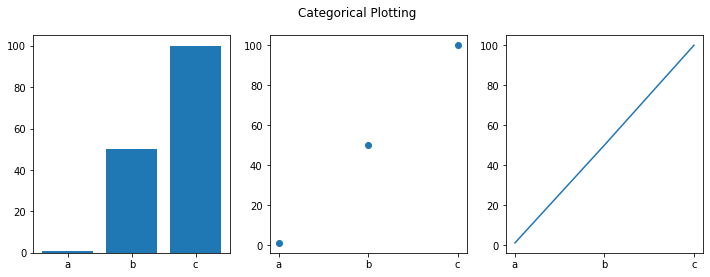

In [3]:
# 서브 플랏 활용하기

alphabet = ['a', 'b', 'c']
values = [1,50 ,100]

# 그래프 형태 잡기
plt.figure(figsize=(12,4))

# 서브플랏 위치 및 종류
#바
plt.subplot(131)
plt.bar(alphabet,values)

# 스캐터
plt.subplot(1,3,2)
plt.scatter(alphabet,values)

# 줄
plt.subplot(133)
plt.plot(alphabet,values)

plt.suptitle('Categorical Plotting')

# 11.16 버전 활용한 데이터 

In [5]:
data = pd.read_csv('data/BIPA_data.csv', index_col=0)
data

,gameId,createDate,tierRank,position,teamId,summonerId,championId,result,level,championsKilled,...,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,lane,gameLength,version
0,5383880006,2021-08-11 06:59:31,P318,S,200,3210877,99,WIN,10,4,...,3602,0,0,11,2830,2181,2181,NONE,972,11.16.390.1945
1,5383880006,2021-08-11 06:59:31,P466,S,100,7550211,35,LOSE,8,1,...,5077,0,2,24,2013,0,0,NONE,972,11.16.390.1945
2,5383880006,2021-08-11 06:59:31,P329,M,200,9306696,266,WIN,11,5,...,11029,0,0,15,6158,585,585,NONE,972,11.16.390.1945
3,5383880006,2021-08-11 06:59:31,P461,T,200,20281103,92,WIN,11,8,...,9944,0,0,10,7615,2318,2318,NONE,972,11.16.390.1945
4,5383880006,2021-08-11 06:59:31,P30,A,200,26082075,22,WIN,10,3,...,6387,0,0,13,3218,2370,2370,NONE,972,11.16.390.1945
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,5384659633,2021-08-11 17:20:44,S146,S,100,21560397,53,WIN,15,1,...,32961,0,0,63,34725,1978,126,BOTTOM,2379,11.16.390.1945
999996,5384659633,2021-08-11 17:20:44,G442,M,100,46320531,166,WIN,18,10,...,24674,1,16,16,21371,8406,7042,MIDDLE,2379,11.16.390.1945
999997,5384659633,2021-08-11 17:20:44,G418,J,200,64820251,64,LOSE,17,5,...,45911,6,68,22,62426,20292,454,JUNGLE,2379,11.16.390.1945
999998,5384659633,2021-08-11 17:20:44,S178,A,100,72310857,81,WIN,17,6,...,28187,8,9,17,19664,11090,1062,BOTTOM,2379,11.16.390.1945


In [12]:
# 챔피언 아이디가 0부터 9까지인 챔피언 관련 데이터를 모음
datal_10 = data[data['championId'].isin(range(0,10))]
groupl_10 = datal_10.groupby('championId', as_index = False).mean()

<BarContainer object of 9 artists>

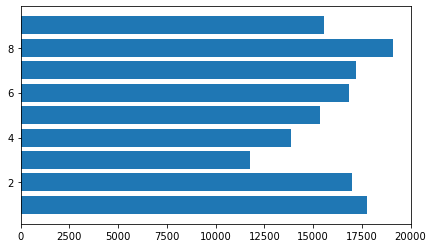

In [14]:
# 챔피언 10까지 데이터를 그래프로 그림
flg, ax = plt.subplots(figsize = (7,4))
ax.barh(groupl_10['championId'], groupl_10['totalDamageDealtToChampions'])

In [15]:
import requests
# 버전에 맞춰 챔피언 정보있는 주소 저장
champ_ver = requests.get('https://ddragon.leagueoflegends.com/realms/na.json').json()['n']['champion']
championJsonURL = 'http://ddragon.leagueoflegends.com/cdn/'+champ_ver+'/data/en_US/champion.json'

# 버전에 맞는 챔피언 정보 
request = requests.get(championJsonURL)
champion_data=request.json()
champion_data.keys()
champion_dict = {}
for c_name in champion_data['data'].keys() :
    champion_dict[int(champion_data['data'][c_name]['key'])]=c_name
champion_dict.keys()
champion = pd.DataFrame.from_dict(champion_dict, orient = 'index', columns = ['champion'])

In [16]:
# champion , data merge
groupl_10 = pd.merge(groupl_10, champion, left_on='championId', right_index= True)

In [19]:
groupl_10

,championId,gameId,teamId,summonerId,level,championsKilled,numDeaths,assists,neutralMinionsKilled,turretsKilled,...,totalDamageDealt,totalDamageTaken,neutralMinionsKilledEnemyJungle,neutralMinionsKilledTeamJungle,visionScore,damageSelfMitigated,damageDealtToObjectives,damageDealtToTurrets,gameLength,champion
0,1,5.384407e+09,149.863574,4.828111e+07,13.522510,5.843793,5.648704,7.482265,5.060027,0.684175,...,79020.755116,13873.920873,0.869031,3.095498,23.654843,8224.886085,3825.978854,1956.866985,1644.729195,Annie
1,2,5.384392e+09,148.995149,5.375949e+07,13.733888,6.730423,5.649342,6.315315,98.355509,0.970201,...,140331.489951,30216.665974,8.994456,65.050589,19.574498,26459.150381,18985.893278,1788.160776,1635.169785,Olaf
2,3,5.384396e+09,149.838319,5.641768e+07,12.682498,3.223727,5.536176,10.374091,2.225748,0.415319,...,65968.596200,18422.628335,0.378941,1.060226,28.201091,21981.946443,2720.986661,1188.933508,1622.791027,Galio
3,4,5.384395e+09,150.449371,4.589860e+07,13.651288,4.387358,5.648292,7.768424,8.230677,1.010785,...,108823.763032,17346.380467,1.172858,5.031756,18.112942,8392.594368,5560.650090,3059.980827,1590.137507,TwistedFate
4,5,5.384395e+09,150.382831,4.981885e+07,13.369142,6.084803,5.800812,6.957309,103.541415,0.819374,...,129307.661833,28847.416589,8.319606,69.758121,20.622390,19254.804176,17998.159397,1483.745244,1612.376798,XinZhao
5,6,5.384378e+09,149.351585,4.985643e+07,14.248559,5.936599,5.662824,4.972622,14.265850,1.667867,...,129441.371758,21756.476945,2.865994,6.420029,18.207493,24718.951729,9548.915706,4071.570605,1637.839337,Urgot
6,7,5.384404e+09,149.812433,5.053182e+07,13.759825,6.782422,4.569310,6.266166,5.830922,0.622544,...,79998.176402,18339.237138,1.080475,3.568149,20.033583,8599.405681,3188.190872,1811.963469,1629.338246,Leblanc
7,8,5.384376e+09,150.943732,5.599144e+07,14.145833,5.597578,5.204772,5.246617,6.983796,0.873041,...,116093.556090,23501.713497,1.582265,3.392806,15.436610,11059.194979,5358.603276,2471.168803,1609.393697,Vladimir
8,9,5.384376e+09,150.058343,4.084821e+07,13.368145,5.127771,5.380688,8.717036,98.850350,0.443116,...,120797.366103,24352.407235,6.529463,70.018670,48.835764,13716.184072,13164.863769,725.270128,1647.637106,Fiddlesticks


<BarContainer object of 9 artists>

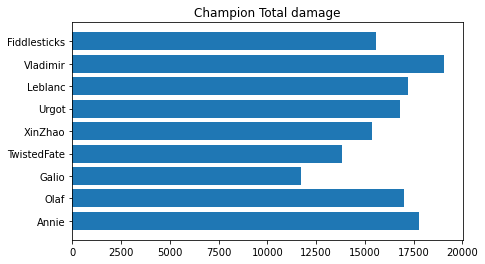

In [21]:
# y축 이름 변경
flg, ax = plt.subplots(figsize = (7,4))
plt.title('Champion Total damage')
ax.barh(groupl_10['champion'], groupl_10['totalDamageDealtToChampions'])

<AxesSubplot:>

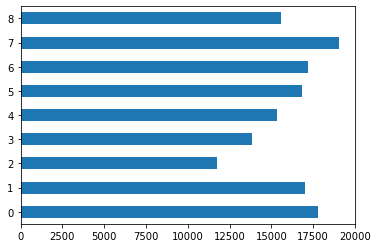

In [25]:
# 데이터 프레임에서 바로 그리기
groupl_10['totalDamageDealtToChampions'].plot(kind='barh')

<AxesSubplot:ylabel='champion'>

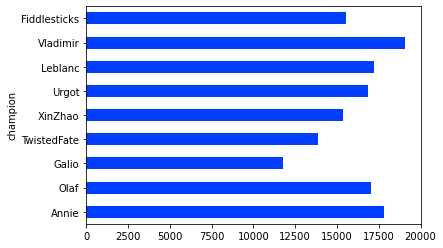

In [27]:
# 인덱스 변경 후 그래프
groupl_10.index = groupl_10.champion
groupl_10['totalDamageDealtToChampions'].plot(kind='barh')

In [28]:
# 색상 변경( 기본 설정 )
sns.set_palette('Paired')

<BarContainer object of 9 artists>

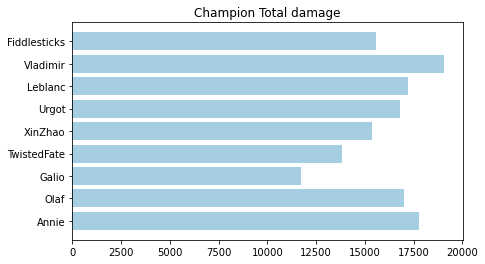

In [29]:
flg, ax = plt.subplots(figsize = (7,4))
plt.title('Champion Total damage')
ax.barh(groupl_10['champion'], groupl_10['totalDamageDealtToChampions'])

<BarContainer object of 9 artists>

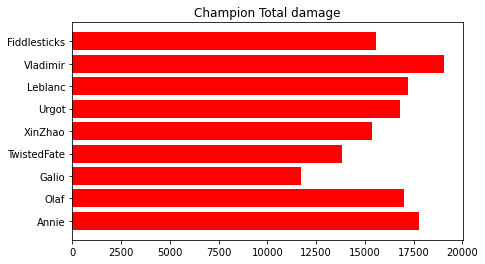

In [31]:
# 색상 변경 ( 하나의 그림만)
flg, ax = plt.subplots(figsize = (7,4))
plt.title('Champion Total damage')
ax.barh(groupl_10['champion'], groupl_10['totalDamageDealtToChampions'], color='red')

In [34]:
# 색상 변경( 기본 설정 )
sns.set_palette('Set3')

<AxesSubplot:title={'center':'Champion Total damage'}, xlabel='totalDamageDealtToChampions', ylabel='champion'>

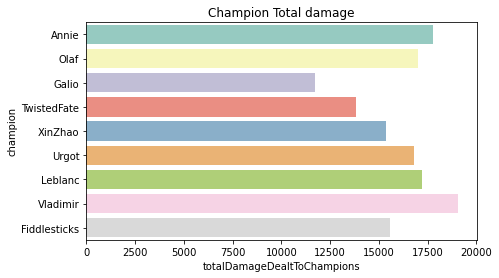

In [35]:
# seaborn
flg, ax = plt.subplots(figsize = (7,4))
plt.title('Champion Total damage')
sns.barplot(data= groupl_10, x = 'totalDamageDealtToChampions', y= 'champion')

In [47]:
# 색상 변경( 기본 설정 )
sns.set_palette('BrBG')

Text(0.5, 1.0, 'Avg Champion damage')

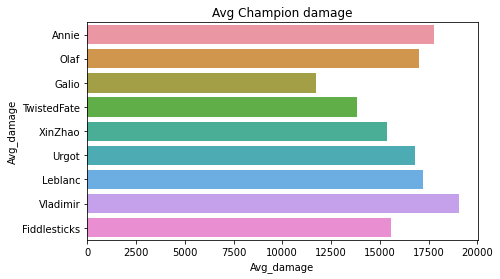

In [48]:
# label, title 변경

flg, ax = plt.subplots(figsize = (7,4))
sns.barplot(data= groupl_10, x = 'totalDamageDealtToChampions', y= 'champion')


ax.set_xlabel('Avg_damage')
ax.set_ylabel('Champion Name')
ax.set_title('Avg Champion damage')

Text(0.5, 1.0, 'Avg Champion damage')

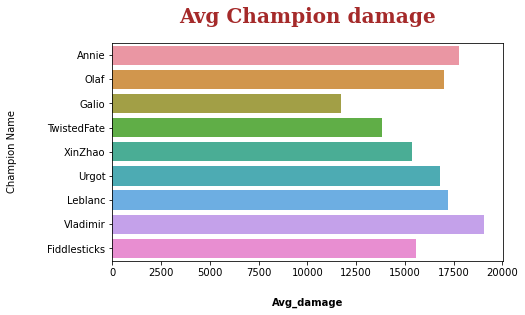

In [58]:
# font 변경
font_label = {
    'color' : 'black',
    "weight" : 'bold'
 }

font_title = {
    'family' : "serif",
    'size'   : 20,
    'color'  : 'brown',
#     'backgroundcolor':'black'
    'weight' : 'bold',
    'verticalalignment'   : 'baseline',
    'horizontalalignment' : 'center'
}

flg, ax = plt.subplots(figsize = (7,4))
sns.barplot(data= groupl_10, x = 'totalDamageDealtToChampions', y= 'champion')


ax.set_xlabel('Avg_damage', fontdict= font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'black', labelpad=30)
ax.set_title('Avg Champion damage', fontdict= font_title, pad=20)

Text(0.5, 1.0, 'Avg Champion damage')

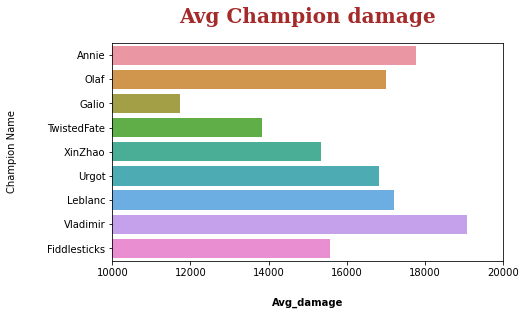

In [60]:
flg, ax = plt.subplots(figsize = (7,4))
sns.barplot(data= groupl_10, x = 'totalDamageDealtToChampions', y= 'champion')

# 한계선 설정
ax.set_xlim(10000,20000)
ax.set_xlabel('Avg_damage', fontdict= font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'black', labelpad=30)
ax.set_title('Avg Champion damage', fontdict= font_title, pad=20)

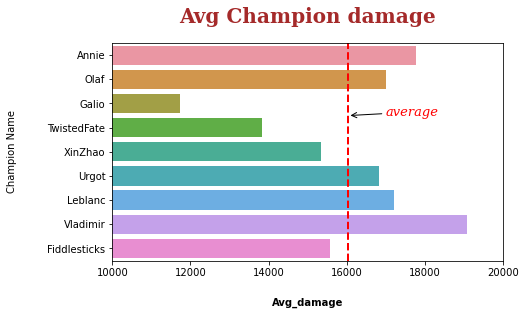

In [75]:
flg, ax = plt.subplots(figsize = (7,4))
sns.barplot(data= groupl_10, x = 'totalDamageDealtToChampions', y= 'champion')

# 한계선 설정
ax.set_xlim(10000,20000)

### 데미지 평균값 표시
damage_mean = groupl_10['totalDamageDealtToChampions'].mean()
ax.axvline(damage_mean, ls= '--', lw = 2, color = 'red')
arrowprops = {
    'arrowstyle' : '->'
}
ax.annotate('average', (damage_mean, 2.5),  xytext= (17000, 2.5) , color='red',
           fontfamily = 'serif', fontstyle = 'italic', fontsize=13, arrowprops=arrowprops)
###

# label 설정
ax.set_xlabel('Avg_damage', fontdict= font_label, labelpad= 20)
ax.set_ylabel('Champion Name', color = 'black', labelpad=30)
ax.set_title('Avg Champion damage', fontdict= font_title, pad=20)

plt.show()

## 다른 모양 그래프

In [76]:
# 색상 변경( 기본 설정 )
sns.set_palette('Set1')

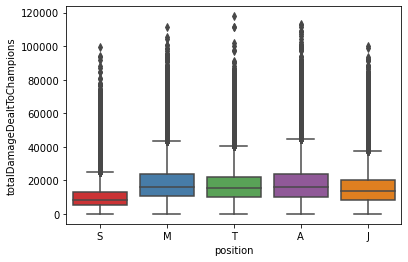

In [77]:
# boxplot
## 이상치 확인하기 좋음
sns.boxplot( y= data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

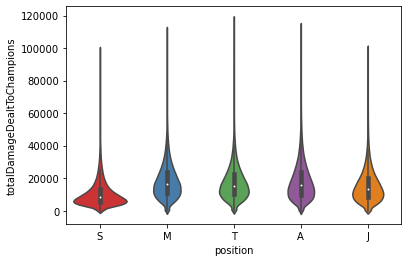

In [78]:
# violinplot
# 분포도를 알 수 있다
sns.violinplot( y= data['totalDamageDealtToChampions'], x = data['position'])
plt.show()

KeyboardInterrupt: 

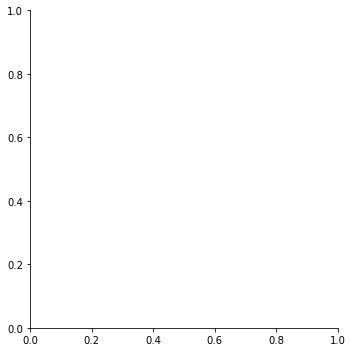

In [81]:
# displot
sns.displot( data[data['totalDamageDealtToChampions'] < 60000 ])['totalDamageDealtToChampions']
plt.show()

In [84]:
group_data = data[data['gameLength'] > 1200].groupby(['position','championId'], as_index=False).mean()

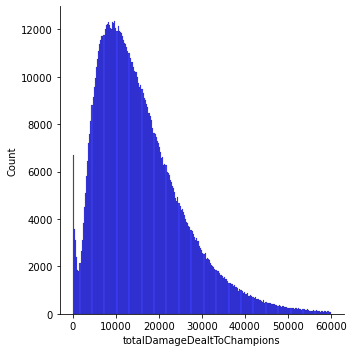

In [89]:
sns.displot( data[data['totalDamageDealtToChampions'] < 60000]['totalDamageDealtToChampions'], color='blue')
plt.show()

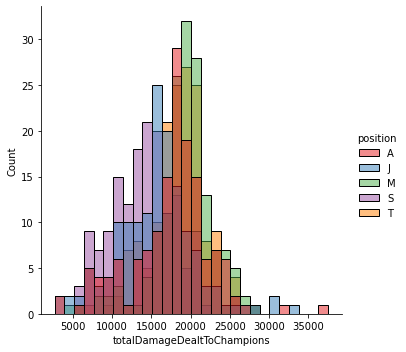

In [85]:
sns.displot( group_data, x = 'totalDamageDealtToChampions', hue = 'position')
plt.show()

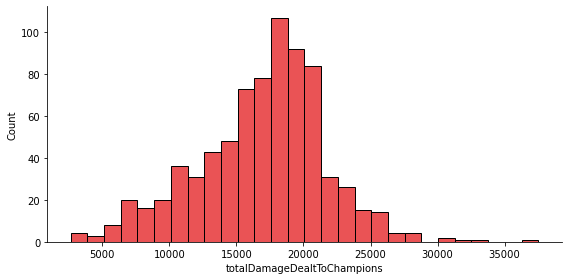

In [90]:
sns.displot( group_data['totalDamageDealtToChampions'] , height=4, aspect=2)

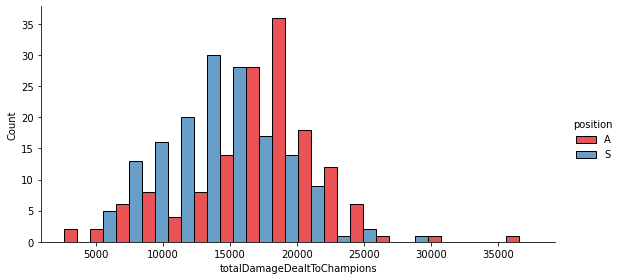

In [91]:
# multiple 에 dodge 를 주면 데이터를 나눠서 보여줌
sns.displot( group_data[group_data['position'].isin(['A','S'])] ,
            x= 'totalDamageDealtToChampions', hue='position', multiple= 'dodge',height=4, aspect=2)
plt.show()

# 챔피언 스탯 데이터 활용

In [92]:
champ_stats = pd.read_csv('data/champ_stats.csv')

In [93]:
champ_stats

,championId,championName,versionIndex,version,hp,hpperlevel,mp,mpperlevel,movespeed,armor,...,attackspeed,hp_18,mp_18,armor_18,spellblock_18,hpregen_18,mpregen_18,crit_18,attackdamage_18,attackspeed_18
0,1,Annie,11.17,11.17.394.4489,524.0,88,418.0,25.0,335,19,...,0.579,2020.0,843.0,87.00,38.50,14.85,21.60,0,94.71,0.7129
1,2,Olaf,11.17,11.17.394.4489,575.0,100,316.0,42.0,350,35,...,0.694,2275.0,1030.0,86.00,53.25,23.80,17.70,0,127.50,1.0125
2,3,Galio,11.17,11.17.394.4489,562.0,112,500.0,40.0,335,24,...,0.625,2466.0,1180.0,83.50,53.25,21.60,21.40,0,118.50,0.7844
3,4,TwistedFate,11.17,11.17.394.4489,534.0,94,333.0,39.0,330,21,...,0.651,2132.0,996.0,74.55,38.50,15.70,21.60,0,108.10,1.0074
4,5,XinZhao,11.17,11.17.394.4489,570.0,92,274.0,55.0,345,35,...,0.645,2134.0,1209.0,94.50,53.25,19.90,14.91,0,114.00,1.0288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,555,Pyke,11.17,11.17.394.4489,600.0,90,415.0,50.0,330,45,...,0.667,2130.0,1265.0,104.50,53.25,15.50,25.00,0,96.00,0.9505
152,777,Yone,11.17,11.17.394.4489,550.0,85,500.0,0.0,345,28,...,0.625,1995.0,500.0,85.80,53.25,20.25,0.00,0,94.00,0.9969
153,875,Sett,11.17,11.17.394.4489,600.0,93,0.0,0.0,340,33,...,0.625,2181.0,0.0,101.00,53.25,15.50,0.00,0,128.00,0.8109
154,876,Lillia,11.17,11.17.394.4489,580.0,90,410.0,50.0,330,22,...,0.625,2110.0,1260.0,90.00,44.75,20.25,27.65,0,113.70,0.9119


In [95]:
sns.set_palette('Set2')

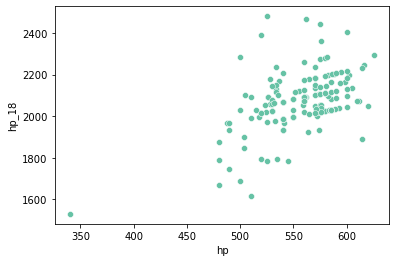

In [96]:
sns.scatterplot( data = champ_stats, x='hp', y='hp_18')
plt.show()

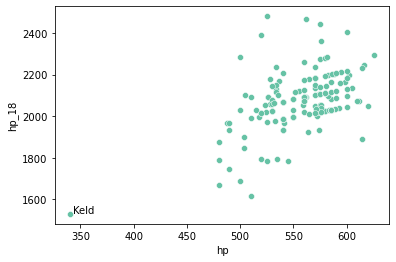

In [97]:
# 이름을 모르니까 이름 넣어주기
sns.scatterplot( data = champ_stats, x='hp', y='hp_18')
plt.text(x= champ_stats[champ_stats['championName'] == 'Kled']['hp'] + 3,
        y = champ_stats[champ_stats['championName'] == 'Kled']['hp_18'] + 3,
        s= 'Keld')
plt.show()

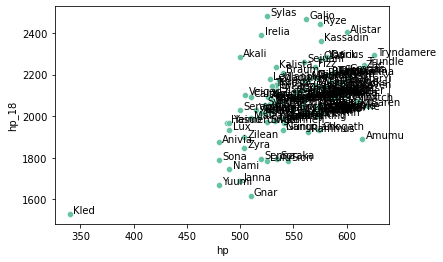

In [104]:
# scatter plot 에 모든 챔프 이름 넣기
sns.scatterplot( data = champ_stats, x='hp', y='hp_18')
for i in champ_stats['championName']:
    plt.text(x= champ_stats[champ_stats['championName'] == i]['hp'] + 3,
             y = champ_stats[champ_stats['championName'] == i]['hp_18'] + 3,
             s= i)

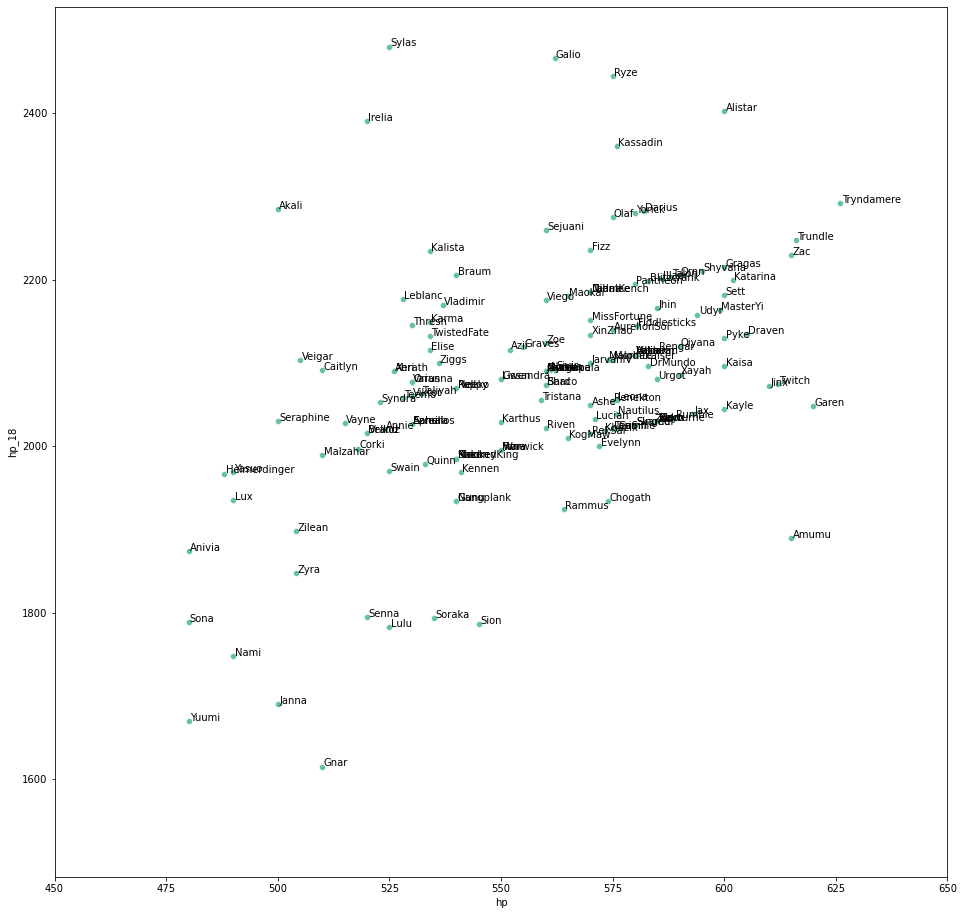

In [107]:
# 강사님꺼
plt.figure(figsize=( 16,16))
sns.scatterplot( data = champ_stats, x='hp', y='hp_18').set_xlim(450,650)
for i in range(champ_stats.shape[0]):
    if champ_stats.championName[i] == 'Kled':
        continue
    plt.text(x = champ_stats['hp'][i] + 0.3,
             y = champ_stats['hp_18'][i] + 0.3,
             s = champ_stats.championName[i])
plt.show()

In [108]:
champ_stats.columns

Index(['championId', 'championName', 'versionIndex', 'version', 'hp',
       'hpperlevel', 'mp', 'mpperlevel', 'movespeed', 'armor', 'armorperlevel',
       'spellblock', 'spellblockperlevel', 'attackrange', 'hpregen',
       'hpregenperlevel', 'mpregen', 'mpregenperlevel', 'crit', 'critperlevel',
       'attackdamage', 'attackdamageperlevel', 'attackspeedperlevel',
       'attackspeed', 'hp_18', 'mp_18', 'armor_18', 'spellblock_18',
       'hpregen_18', 'mpregen_18', 'crit_18', 'attackdamage_18',
       'attackspeed_18'],
      dtype='object')

## 데미지로 다시 그려보기

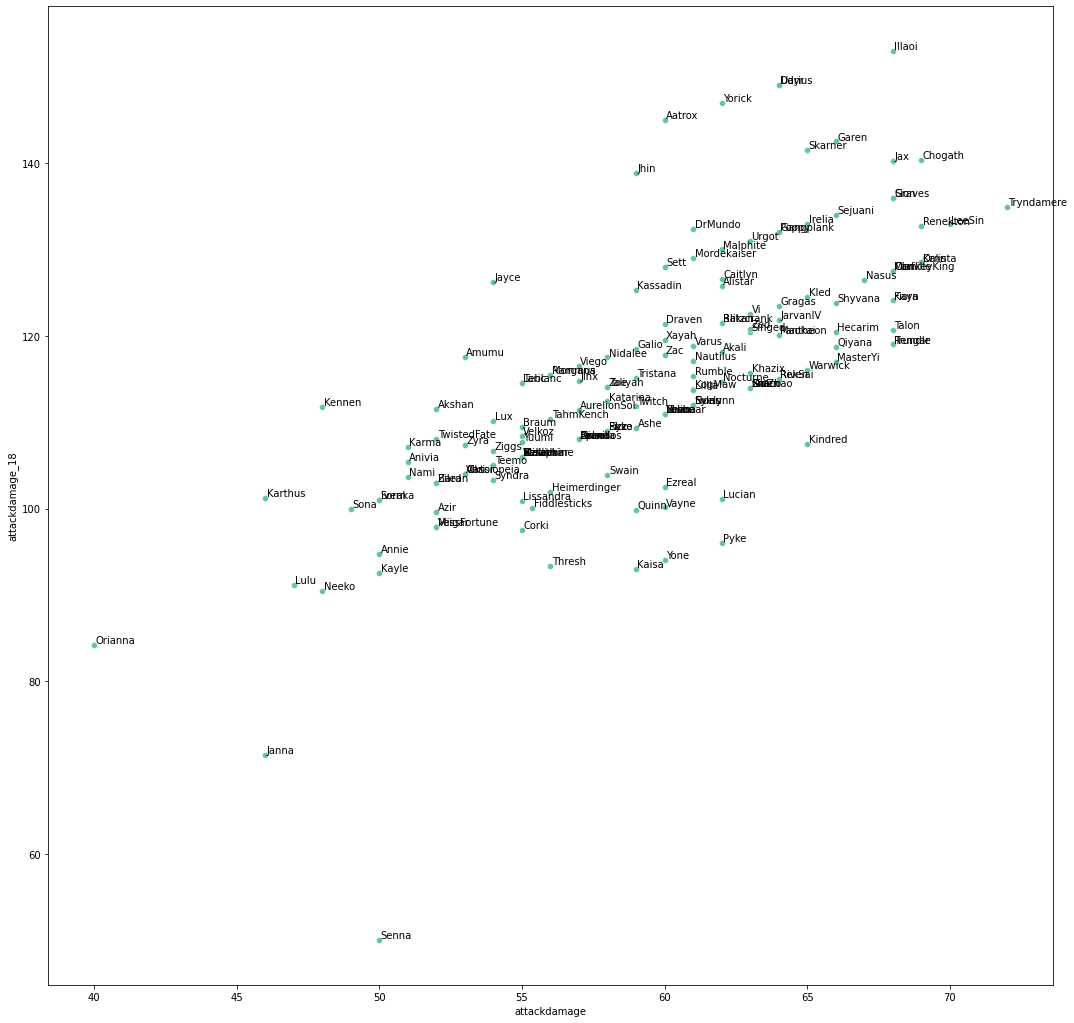

In [123]:
# 내꺼
plt.figure(figsize=( 18,18))
sns.scatterplot( data = champ_stats, x='attackdamage', y='attackdamage_18')
for i in champ_stats['championName']:
    plt.text(x= champ_stats[champ_stats['championName'] == i]['attackdamage'] + 0.05,
            y = champ_stats[champ_stats['championName'] == i]['attackdamage_18'] + 0.2,
            s= i)

plt.show()

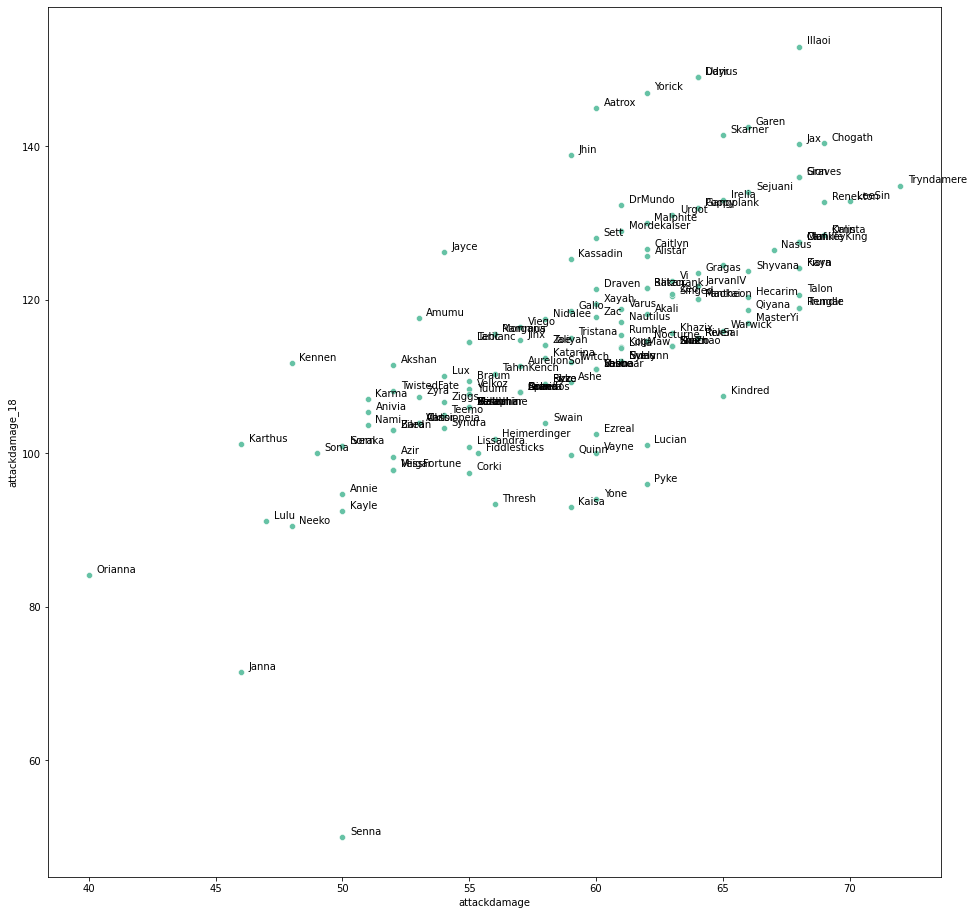

In [121]:
# 강사님꺼
plt.figure(figsize=( 16,16))
sns.scatterplot( data = champ_stats, x='attackdamage', y='attackdamage_18')
for i in range(champ_stats.shape[0]):
    if champ_stats.championName[i] == 'Kled':
        continue
    plt.text(x = champ_stats['attackdamage'][i] + 0.3,
             y = champ_stats['attackdamage_18'][i] + 0.3,
             s = champ_stats.championName[i])
plt.show()

# 어택 데미지, 스피드 비교

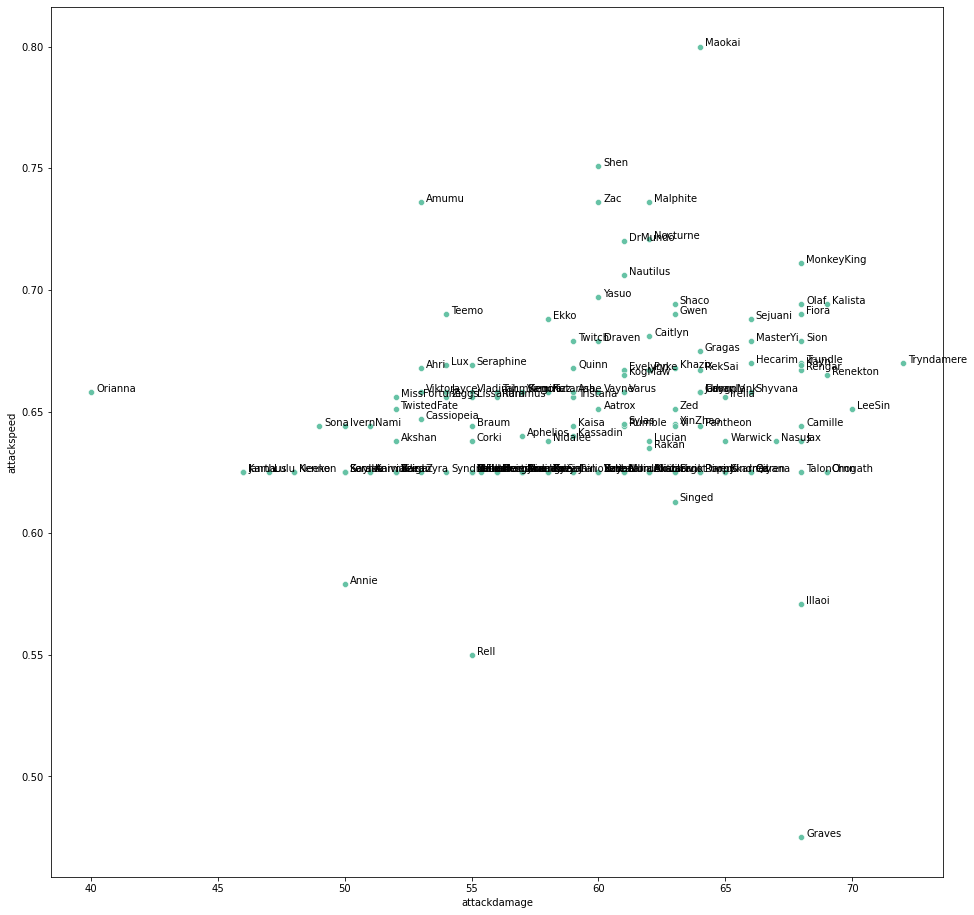

In [128]:
# 강사님꺼
plt.figure(figsize=( 16,16))
sns.scatterplot( data = champ_stats, x='attackdamage', y='attackspeed')
for i in range(champ_stats.shape[0]):
    if champ_stats.championName[i] == 'Kled':
        continue
    plt.text(x = champ_stats['attackdamage'][i]+0.2,
             y = champ_stats['attackspeed'][i]+0.0001,
             s = champ_stats.championName[i])
plt.show()